In [319]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [320]:
# Import the libraries
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [321]:
train = pd.read_csv("C://Users//AMIT YADAV//Downloads//SUPERVISED LEARNING - CLASSIFICATION//datasets//BIG SALES MART DATA OF USA//training.csv")

In [322]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [323]:
test = pd.read_csv("C://Users//AMIT YADAV//Downloads//SUPERVISED LEARNING - CLASSIFICATION//datasets//BIG SALES MART DATA OF USA//testing.csv")

In [324]:
test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [325]:
s=[]
for i in train.columns:
    if np.dtype(train[i]).name=='object':
        s.append(i)

In [326]:
s  #so these are object columns in the dataset

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [327]:
train.isnull().sum()[train.isnull().sum()>0]

Item_Weight    1463
Outlet_Size    2410
dtype: int64

In [328]:
train.shape

(8523, 12)

In [329]:
test.shape  #in testing no. of columns is always one less than no. of columns in training 

(5681, 11)

In [330]:
#Finding the missing or null values
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [331]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

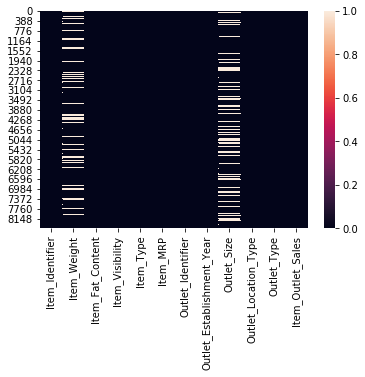

In [332]:
sns.heatmap(train.isnull())

# Performing EDA

C:\Users\AMIT YADAV\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


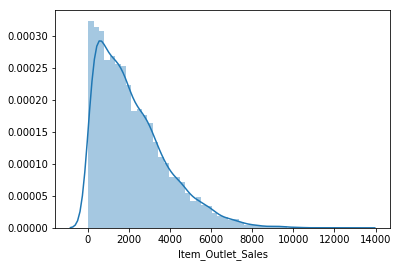

In [333]:
#Distribution Plot
#dependent variable/target variable that is outlet sales (this is univariate analysis)
sns.distplot(train.Item_Outlet_Sales)
#here we get that data is little skewed

In [334]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [335]:
train.Item_Outlet_Sales.head() 

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [336]:
a=pd.notnull(train.Item_Weight)  #here we are getting the boolean output for null and not null values
a

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7       False
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18      False
19       True
20       True
21      False
22       True
23      False
24       True
25       True
26       True
27       True
28       True
29      False
        ...  
8493     True
8494     True
8495     True
8496     True
8497     True
8498     True
8499     True
8500     True
8501     True
8502     True
8503     True
8504    False
8505     True
8506     True
8507     True
8508     True
8509     True
8510     True
8511     True
8512     True
8513     True
8514     True
8515     True
8516     True
8517     True
8518     True
8519     True
8520     True
8521     True
8522     True
Name: Item_Weight, Length: 8523, dtype: bool

In [337]:
train[a].head(2)  #so here we get the dataset for all values not null values of the column item_weight

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [338]:
train[a].shape

(7060, 12)

In [339]:
#or
train[pd.notnull(train.Item_Weight)].head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


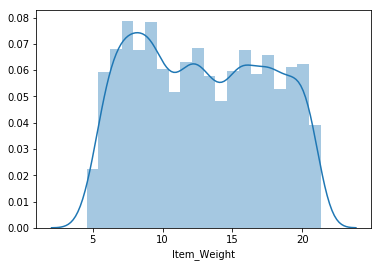

In [340]:
sns.distplot(train[a]['Item_Weight'])  # here we get distribution plot of item_weight column

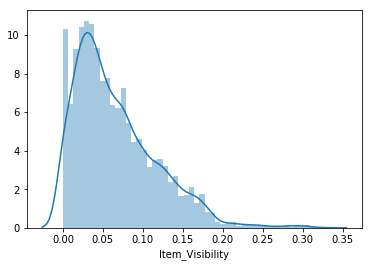

In [341]:
sns.distplot(train.Item_Visibility)  #here item visibility means in store that product is available on the store
#here also we got a skewed curve

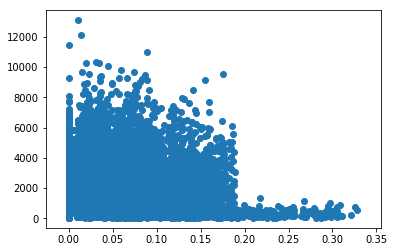

In [342]:
plt.scatter(train.Item_Visibility,train.Item_Outlet_Sales)
#so there is huge sales on zero visibility which is not possible so it is anamoly in the data

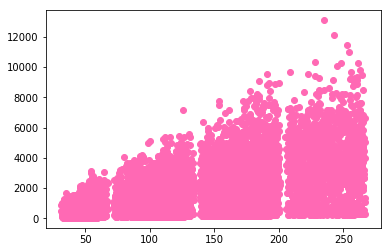

In [343]:
#plot MRP VS outlet sales
plt.scatter(x=train.Item_MRP,y=train.Item_Outlet_Sales, color='hotpink')
#or#plt.scatter(x=train.Item_MRP,y=train.Item_Outlet_Sales, color='hotpink')

In [344]:
train.Item_MRP/train.Item_Weight

0       26.861204
1        8.153581
2        8.092457
3        9.484115
4        6.031512
5        4.944762
6        4.224088
7             NaN
8        5.985963
9        9.782365
10       3.859339
11       7.789741
12       9.634344
13       6.799898
14      12.014838
15       6.262378
16       9.775356
17       6.040156
18            NaN
19      17.268554
20      13.308881
21            NaN
22      13.459479
23            NaN
24      11.914874
25       3.531231
26       5.534493
27       3.357631
28       7.680776
29            NaN
          ...    
8493    25.496927
8494     7.269158
8495    16.554100
8496    24.980889
8497    10.989377
8498     8.115505
8499     8.621052
8500     6.150752
8501    18.808202
8502    25.702993
8503     5.862224
8504          NaN
8505    20.078514
8506    15.257449
8507    17.312755
8508    17.574819
8509    26.418543
8510    16.782493
8511    15.005200
8512     8.613662
8513     8.325350
8514     3.839360
8515     7.610087
8516     3.159075
8517     8

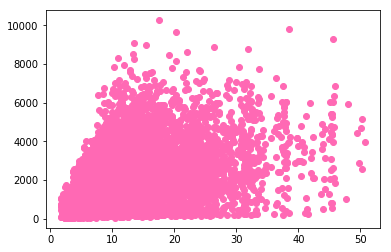

In [345]:
#price per unit vs sales
plt.scatter(train.Item_MRP/train.Item_Weight,train.Item_Outlet_Sales, color='hotpink')
#so here we see that most of the items which are sold are under 30 dollars

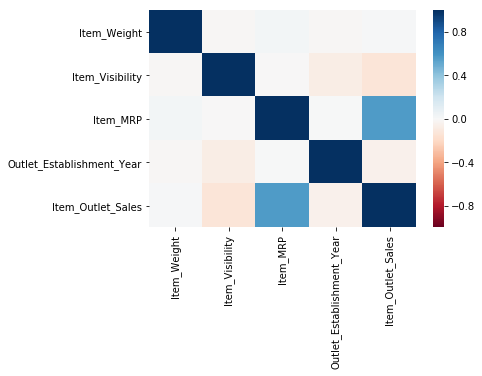

In [346]:
sns.heatmap(train.corr(),vmax=1,vmin=-1,cmap="RdBu")

In [347]:
np.corrcoef(train.Item_MRP,train.Item_Outlet_Sales)

array([[1.        , 0.56757445],
       [0.56757445, 1.        ]])

In [348]:
#feature engineering part-1
#creating a new variable called price_per_unit
#making new column
train["Price_per_Unit"]=train.Item_MRP/train.Item_Weight

In [349]:
#train.columns

In [350]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price_per_Unit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581


In [351]:
#in test data also we add new column called price_per_unit
test["Price_per_Unit"]=test.Item_MRP/test.Item_Weight

In [352]:
#test.columns

In [353]:
test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Price_per_Unit
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,5.198178
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,10.520458


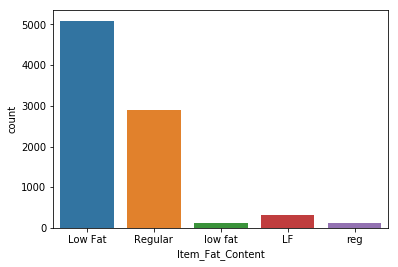

In [354]:
#Countplot
#Item_Fat_Content 
sns.countplot(train.Item_Fat_Content)

In [355]:
#making copy of train
train2=train

In [356]:
#here we have only two LF and regular! 
train2.groupby(["Item_Fat_Content","Item_Type"])["Item_MRP"].mean()

Item_Fat_Content  Item_Type            
LF                Baking Goods             115.641430
                  Breads                   120.514400
                  Breakfast                138.536400
                  Canned                   123.988176
                  Dairy                    131.105367
                  Frozen Foods             161.783300
                  Fruits and Vegetables    141.536513
                  Hard Drinks              136.909400
                  Health and Hygiene       135.490897
                  Household                145.847774
                  Meat                     119.331880
                  Others                   143.399618
                  Seafood                  103.856900
                  Snack Foods              147.262510
                  Soft Drinks              139.496850
                  Starchy Foods            156.902489
Low Fat           Baking Goods             121.286145
                  Breads                  

In [357]:
train2.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [358]:
#merging lf,lowfat and reg in Low Fat and Regular
train2.Item_Fat_Content.replace(to_replace=["Low Fat", "Regular",'low fat','LF','reg'], value=["Low Fat","Regular",'Low Fat','Low Fat','Regular'],inplace=True)
#so here we get two category inplace of three category

In [359]:
train2.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

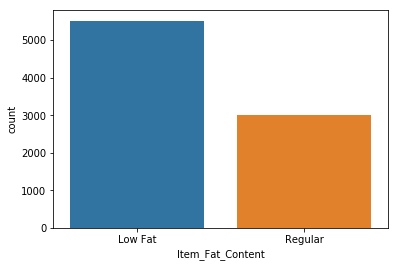

In [360]:
sns.countplot(train2.Item_Fat_Content)

In [361]:
#make copy of test
test2=test

In [362]:
type(test2)

pandas.core.frame.DataFrame

In [363]:
test2.Item_Fat_Content.value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

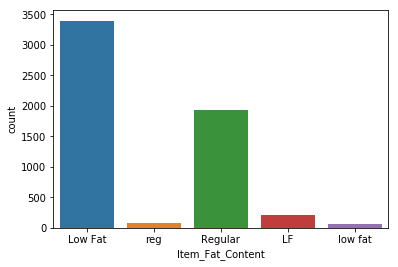

In [364]:
#Countplot
#Item_Fat_Content 
sns.countplot(test2.Item_Fat_Content)

In [365]:
# in test data,merging lf,lowfat and reg in Low Fat and Regular
test2.Item_Fat_Content.replace(to_replace=["Low Fat", "Regular",'low fat','LF','reg'], value=["Low Fat","Regular",'Low Fat','Low Fat','Regular'],inplace=True)

In [366]:
test2.Item_Fat_Content.value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

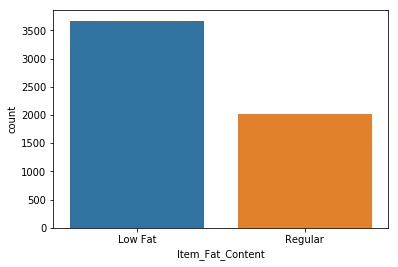

In [367]:
sns.countplot(test2.Item_Fat_Content)

In [368]:
train2.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price_per_Unit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581


In [369]:
test2.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Price_per_Unit
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,5.198178
1,FDW14,8.30,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,10.520458


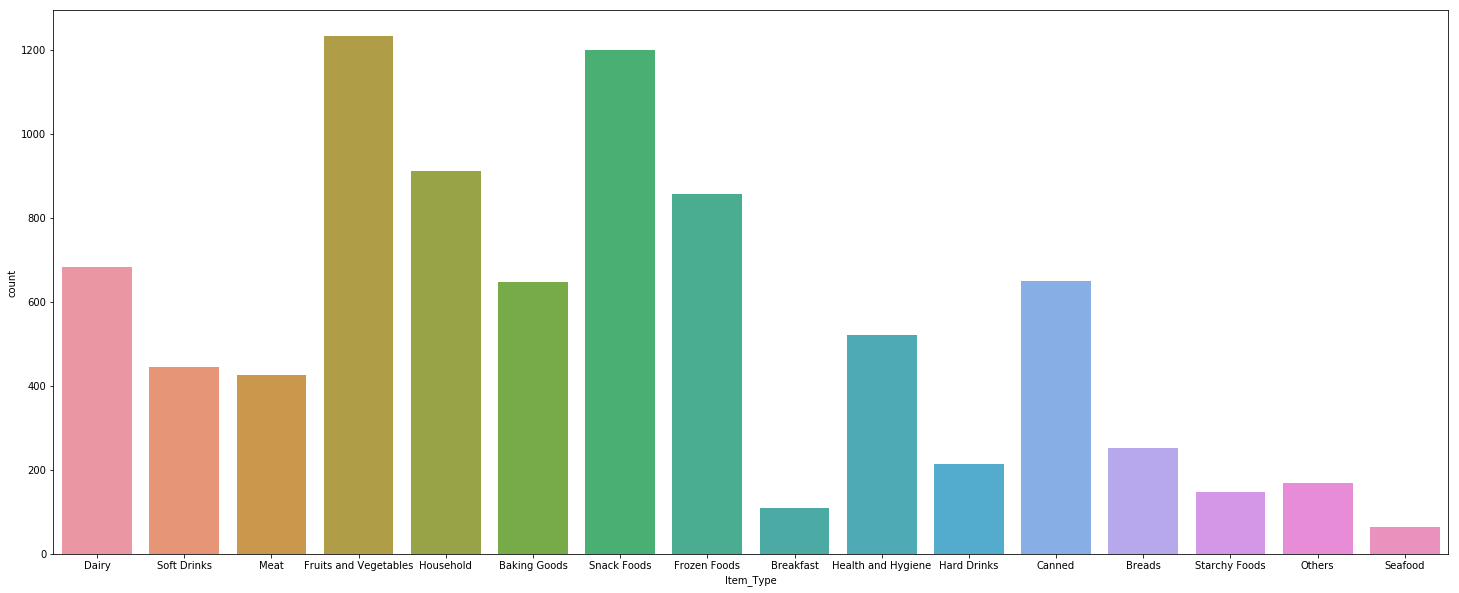

In [370]:
#count plot of item type of train dataset
plt.figure(figsize=[25,10])
sns.countplot(train2.Item_Type)
#so here we find that fruits and vegetables has the highest count followed by Snack foods,housebolds,dairy

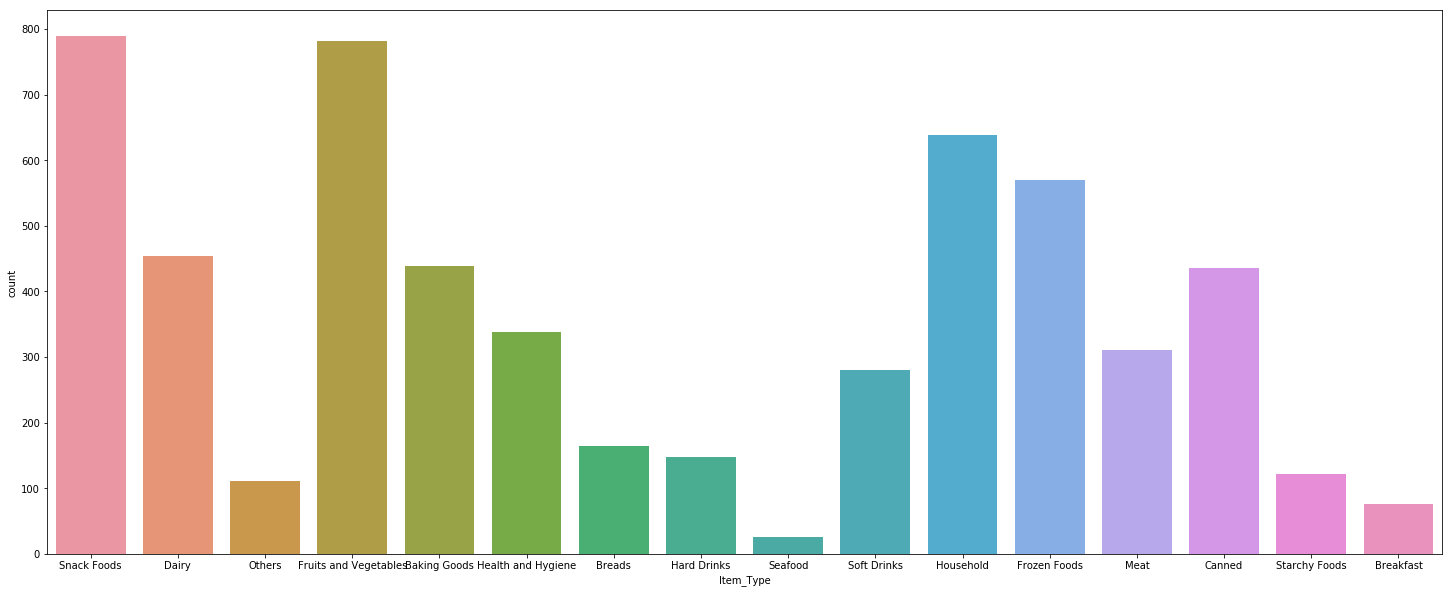

In [371]:
#count plot of item type of test dataset
plt.figure(figsize=[25,10])
sns.countplot(test2.Item_Type)
#here wefind that fruits and vegetables and snack foods have almost same count

In [372]:
train2.shape

(8523, 13)

In [373]:
test2.shape

(5681, 12)

In [374]:
train2.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Price_per_Unit'],
      dtype='object')

In [375]:
test2.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Price_per_Unit'],
      dtype='object')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

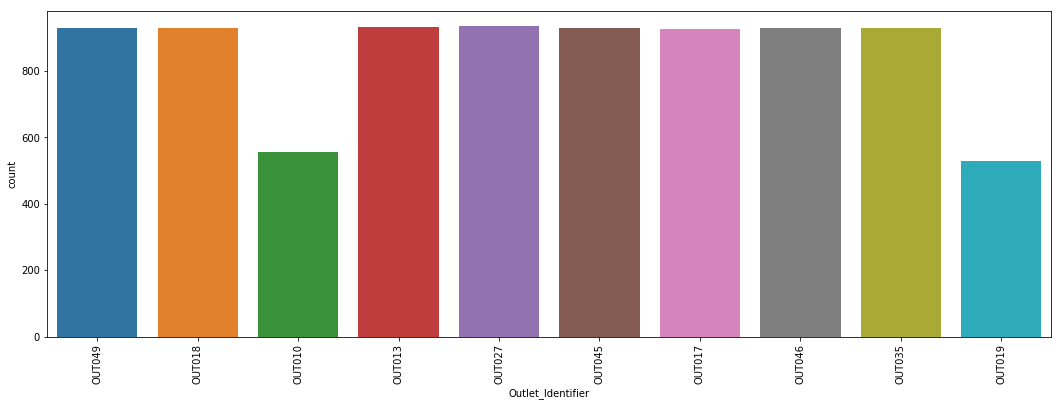

In [376]:
#countplot for Outlet_Identifier column in train dataset
plt.figure(figsize=[18,6])
sns.countplot(train2.Outlet_Identifier)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

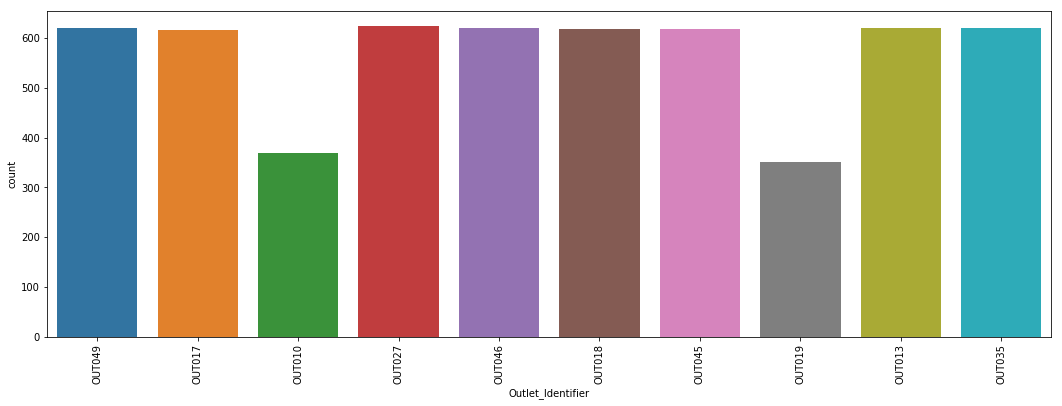

In [377]:
#countplot for outlet_identifier column in test dataset
plt.figure(figsize=[18,6])
sns.countplot(test2.Outlet_Identifier)
plt.xticks(rotation=90)

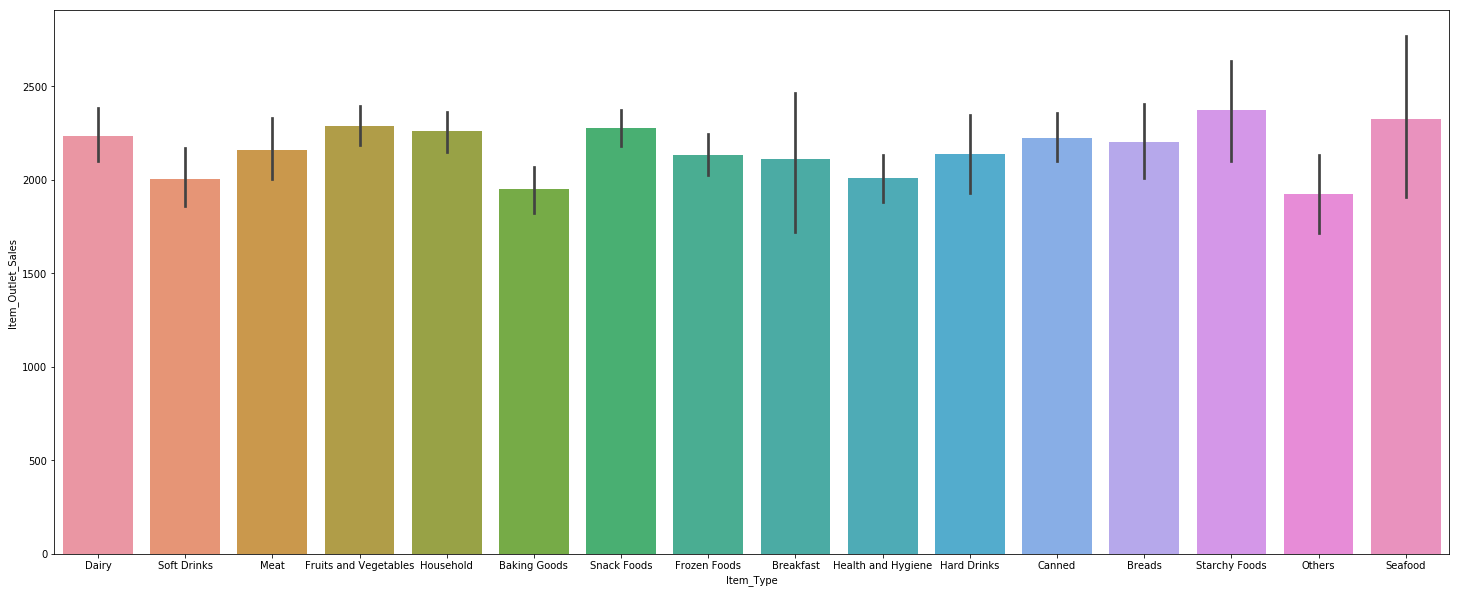

In [378]:
#stacked bar graph
plt.figure(figsize=[25,10])
sns.barplot(train2.Item_Type,train2.Item_Outlet_Sales)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

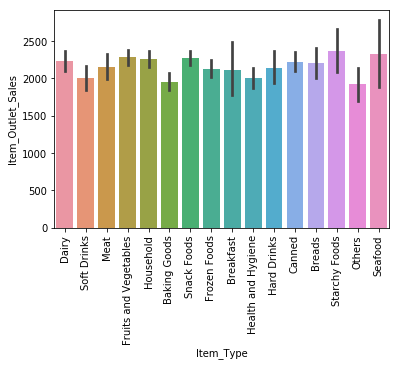

In [379]:
#or
#Stacked Bar graph 
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=train)
plt.xticks(rotation=90)

# MISSING VALUES

In [380]:
train2.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Price_per_Unit               1463
dtype: int64

In [381]:
#Item Weight and Outlet Size 

In [382]:
train2.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [383]:
train2.Item_Weight=train2.Item_Weight.fillna(12.6)

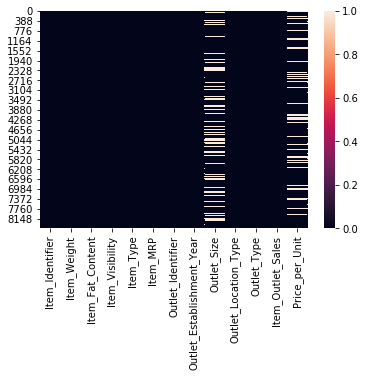

In [384]:
sns.heatmap(train2.isnull())

In [385]:
test2.Item_Weight=test2.Item_Weight.fillna(12.6)

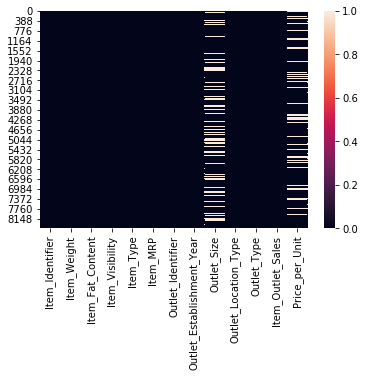

In [386]:
sns.heatmap(train2.isnull())

In [387]:
train2.Item_Weight[train.Item_Identifier=="NCD19"]

4       8.93
522     8.93
802     8.93
2129    8.93
2907    8.93
3428    8.93
Name: Item_Weight, dtype: float64

In [388]:
train2.groupby('Item_Identifier').transform(lambda x:x.fillna(x.notnull().median())) #filling missing values using lambda function

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price_per_Unit
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,Tier 3,Grocery Store,732.3800,9.484115
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512
5,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,4.944762
6,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,4.224088
7,12.600,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,1.000000
8,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,1,Tier 2,Supermarket Type1,1076.5986,5.985963
9,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,1,Tier 2,Supermarket Type1,4710.5350,9.782365


In [389]:
newtrain=train2.groupby('Item_Identifier').transform(lambda x:x.fillna(x.notnull().median()))
#HERE WE ARE USING FILLNA USING LAMBDA FUNCTION
#here transform means it will take all the values of the median of the respective columns and fill them accordingly.
#transform functions groupby the item id and put the values into the missing data.

In [390]:
newtrain.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Price_per_Unit               0
dtype: int64

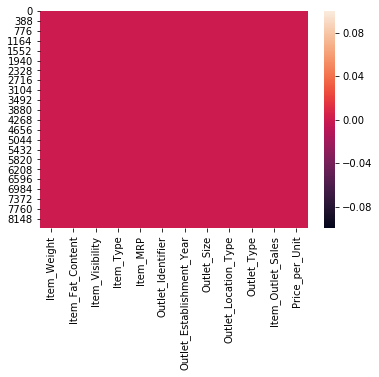

In [392]:
sns.heatmap(newtrain.isnull())

In [393]:
test2.Item_Weight[test.Item_Identifier=="NCD19"]

149     12.60
1944     8.93
5377     8.93
Name: Item_Weight, dtype: float64

In [394]:
test2.groupby('Item_Identifier').transform(lambda x:x.fillna(x.notnull().median())) #filling missing values in the test dataset using lambda function

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Price_per_Unit
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,5.198178
1,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,0.5,Tier 2,Supermarket Type1,10.520458
2,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,1,Tier 3,Grocery Store,16.558479
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,1,Tier 2,Supermarket Type1,21.193985
4,12.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,1.000000
5,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1,11.954000
6,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2,2.589323
7,12.600,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3,1.000000
8,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,0.5,Tier 2,Supermarket Type1,15.185345
9,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,1,Tier 2,Supermarket Type1,31.226800


In [395]:
newtest=test2.groupby('Item_Identifier').transform(lambda x:x.fillna(x.notnull().median()))

In [396]:
newtest.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Price_per_Unit               0
dtype: int64

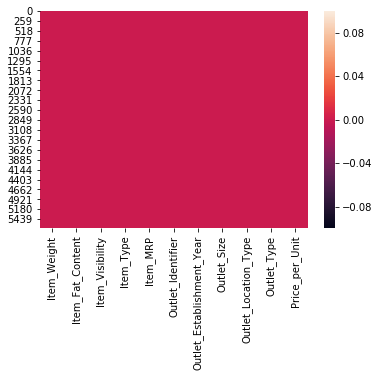

In [397]:
sns.heatmap(newtest.isnull())

In [398]:
train2.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [399]:
train2.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Price_per_Unit               1463
dtype: int64

In [400]:
test2.Outlet_Size.value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [401]:
test2.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
Price_per_Unit                976
dtype: int64

In [402]:
train2.Outlet_Size=train2.Outlet_Size.fillna("Medium")
test2.Outlet_Size=train2.Outlet_Size.fillna("Medium")

In [403]:
train2.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Price_per_Unit               1463
dtype: int64

In [404]:
train2.Price_per_Unit.mean()

12.745885930457531

In [405]:
test2.isnull().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Price_per_Unit               976
dtype: int64

In [406]:
test2.Price_per_Unit.mean()

12.883723839816314

In [407]:
train2.Price_per_Unit=train2.Price_per_Unit.fillna(13)
test2.Price_per_Unit=train2.Price_per_Unit.fillna(13)

In [408]:
train2.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Price_per_Unit               0
dtype: int64

In [409]:
test2.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Price_per_Unit               0
dtype: int64

In [410]:
train2.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price_per_Unit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581


In [411]:
test2.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Price_per_Unit
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,26.861204
1,FDW14,8.30,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,8.153581


In [412]:
#Item Visibility
train2.Item_Visibility.describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [413]:
test2.Item_Visibility.describe()

count    5681.000000
mean        0.065684
std         0.051252
min         0.000000
25%         0.027047
50%         0.054154
75%         0.093463
max         0.323637
Name: Item_Visibility, dtype: float64

In [414]:
train2.Item_Visibility.replace(to_replace=0,value=0.053931,inplace=True)

In [415]:
test2.Item_Visibility.replace(to_replace=0,value=0.054154,inplace=True)

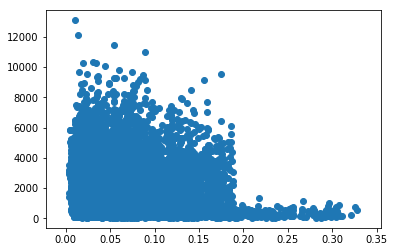

In [416]:
plt.scatter(train2.Item_Visibility,train2.Item_Outlet_Sales)

# Feature Engineering

In [417]:
train2.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price_per_Unit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581


In [418]:
#we can extract first two letters of ID which have significant relation with  item Type
train2.Item_Identifier[0][0:2]  #here FD is food items

'FD'

In [419]:
train2.Item_Identifier[1][0:2] #here DR is drinks #here [1] means first row

'DR'

In [420]:
train2.Item_Identifier[4][0:2] #here [4] means 4th row

'NC'

In [421]:
train2.shape

(8523, 13)

In [422]:
test2.shape

(5681, 12)

In [423]:
#making new column called item id in the train column
itemid=[]
for i in range (0,8523):
    itemid.append(train2.Item_Identifier[i][0:2]) #here i represents row

In [424]:
train2['Item_id']=pd.Series(itemid)

In [425]:
train2.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price_per_Unit,Item_id
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581,DR


In [426]:
train2.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [427]:
#Making new column called itemid in the test data
itemid=[]
for i in range (0,5681):
    itemid.append(test2.Item_Identifier[i][0:2])


In [428]:
test2['Item_id']=pd.Series(itemid)

In [429]:
test2.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Price_per_Unit,Item_id
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,26.861204,FD
1,FDW14,8.30,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,8.153581,FD


In [430]:
newtrain=train2.drop(["Outlet_Establishment_Year","Item_Identifier"],axis=1)

In [431]:
newtrain.shape

(8523, 12)

In [432]:
dtrain=pd.get_dummies(newtrain)

In [433]:
dtrain.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Price_per_Unit', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Ty

In [434]:
dtrain.shape

(8523, 46)

In [436]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_train0=sc.fit_transform(dtrain)

C:\Users\AMIT YADAV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\AMIT YADAV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [437]:
scaled_train=pd.DataFrame(scaled_train0,columns=dtrain.columns)

In [439]:
scaled_train.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Price_per_Unit,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_id_DR,Item_id_FD,Item_id_NC
0,-0.831187,-1.092518,1.747454,0.910601,1.931129,0.738147,-0.738147,-0.286855,-0.174193,-0.114346,...,1.602840,-0.696678,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
1,-1.630810,-1.026432,-1.489023,-1.018440,-0.636211,-1.354743,1.354743,-0.286855,-0.174193,-0.114346,...,-0.623893,-0.696678,1.242650,-0.381529,-1.375891,2.860816,-0.351028,3.109193,-1.598190,-0.480558


In [440]:
newtest=test2.drop(["Outlet_Establishment_Year","Item_Identifier"],axis=1)

In [441]:
dtest=pd.get_dummies(newtest)

In [442]:
dtest.shape

(5681, 45)

In [457]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_test0=sc.fit_transform(dtest)

C:\Users\AMIT YADAV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\AMIT YADAV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [458]:
scaled_test=pd.DataFrame(scaled_test0,columns=dtest.columns)

In [459]:
x=scaled_train.drop("Item_Outlet_Sales",axis=1)
y=scaled_train.Item_Outlet_Sales

In [460]:
from sklearn.tree import DecisionTreeRegressor
dtree_reg=DecisionTreeRegressor()
model=dtree_reg.fit(x,y)
predictions=dtree_reg.predict(scaled_test)

In [461]:
predictions.shape

(5681,)

In [462]:
scaled_test.shape

(5681, 45)

In [463]:
saveit=sc.fit_transform(pd.DataFrame(train2.Item_Outlet_Sales))

In [469]:
sales_pred=sc.inverse_transform(predictions)

In [470]:
sales_pred

array([3020.0688,  959.4178,  759.012 , ..., 1428.141 , 7247.233 ,
       3079.325 ])

In [471]:
solution = pd.DataFrame({"Item_Identifier": test.Item_Identifier, 
                        "Outlet_Identifier": test.Outlet_Identifier,
                        "Item_Outlet_Sales": sales_pred})

In [472]:
solution.to_csv("Prediction.csv",index=False)

In [473]:
cd

C:\Users\AMIT YADAV
